In [2]:
import pandas as pd #used for data manipulation.
import numpy as np #used for mathematical functions.
import matplotlib.pyplot as plt #used for charts.
import matplotlib
%matplotlib inline
import seaborn as sns 

matplotlib.rcParams['font.size'] = 12

from IPython.core.pylabtools import figsize
from sklearn.cluster import KMeans
import sklearn.cluster as cluster

In [3]:
diabetes = pd.read_excel('diabetes_mellitus_study.xlsx')

The dataset diabetes-mellitus_study was imported and renamed as diabetes.

In [4]:
diabetes.head()

,case_id,glucose_level,blood_pressure,insulin_level,bmi,gender,age,outcome
0,1,117,86,105,39.1,Male,42,0
1,2,97,60,0,28.2,Female,22,0
2,3,109,64,99,34.8,Male,26,1
3,4,122,78,0,23.0,Male,40,0
4,5,189,64,325,31.2,Female,29,1


In [5]:
diabetes.describe()

,case_id,glucose_level,blood_pressure,insulin_level,bmi,age,outcome
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,120.387700,68.943100,79.790200,31.863490,33.121000,0.350900
std,2886.89568,31.913571,19.591071,114.989378,7.906584,11.684358,0.477276
min,1.00000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,2500.75000,99.000000,62.000000,0.000000,27.300000,24.000000,0.000000
50%,5000.50000,116.000000,72.000000,36.000000,32.000000,29.000000,0.000000
75%,7500.25000,140.000000,80.000000,128.000000,36.400000,40.000000,1.000000
max,10000.00000,199.000000,122.000000,846.000000,67.100000,81.000000,1.000000


Zero minimum values for some of the variables like the bmi and blood pressure does not make a lot sense so must be replace by the mean values of the corresponding columns

In [6]:
diabetes_col = diabetes['bmi']

In [7]:
diabetes_col2 = diabetes['blood_pressure']

In [8]:
diabetes_col.replace(to_replace = 0, value = diabetes_col.mean(), inplace=True)

In [9]:
diabetes_col2.replace(to_replace = 0, value = diabetes_col.mean(), inplace=True)

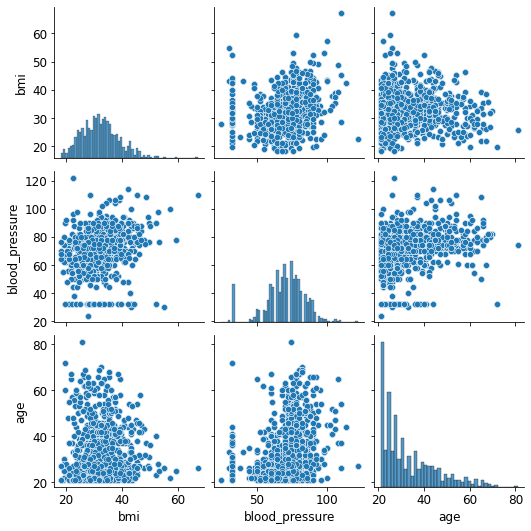

In [10]:
sns.pairplot(diabetes[['bmi', 'blood_pressure', 'age']])
plt.show()

In [11]:
diabetes.describe()

,case_id,glucose_level,blood_pressure,insulin_level,bmi,age,outcome
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,120.387700,70.490087,79.790200,32.363747,33.121000,0.350900
std,2886.89568,31.913571,14.770187,114.989378,6.806046,11.684358,0.477276
min,1.00000,0.000000,24.000000,0.000000,18.200000,21.000000,0.000000
25%,2500.75000,99.000000,62.000000,0.000000,27.500000,24.000000,0.000000
50%,5000.50000,116.000000,72.000000,36.000000,32.000000,29.000000,0.000000
75%,7500.25000,140.000000,80.000000,128.000000,36.400000,40.000000,1.000000
max,10000.00000,199.000000,122.000000,846.000000,67.100000,81.000000,1.000000


The mean values are now non-zero for the imputed varaibles.

In [12]:
kmeans = cluster.KMeans(n_clusters = 4, init='k-means++')
kmeans= kmeans.fit(diabetes[['age', 'bmi', 'outcome']])

In [13]:
kmeans.cluster_centers_

array([[26.14867794, 39.53944517,  0.3775466 ],
       [40.20367534, 34.04881317,  0.51071975],
       [57.27318296, 30.86149894,  0.50543024],
       [25.05587024, 27.43132176,  0.1799691 ]])

In [14]:
diabetes['Clusters']=kmeans.labels_

In [15]:
diabetes.head()

,case_id,glucose_level,blood_pressure,insulin_level,bmi,gender,age,outcome,Clusters
0,1,117,86.0,105,39.1,Male,42,0,1
1,2,97,60.0,0,28.2,Female,22,0,3
2,3,109,64.0,99,34.8,Male,26,1,0
3,4,122,78.0,0,23.0,Male,40,0,1
4,5,189,64.0,325,31.2,Female,29,1,3


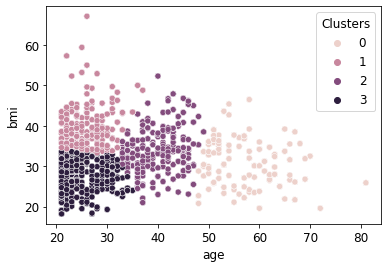

In [126]:
sns.scatterplot(x='age', y='bmi', hue='Clusters', data=diabetes)
plt.show()